In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\data-science-journey\Datasets\Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df[df.duplicated()].sum()

# no duplicates on this dataset

customer_id           0
credit_score          0
country               0
gender                0
age                   0
tenure                0
balance             0.0
products_number       0
credit_card           0
active_member         0
estimated_salary    0.0
churn                 0
dtype: object

In [10]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# check for missing values

df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [18]:
# customer churn by age

df['age'].max()

92

In [19]:
df['age'].min()

18

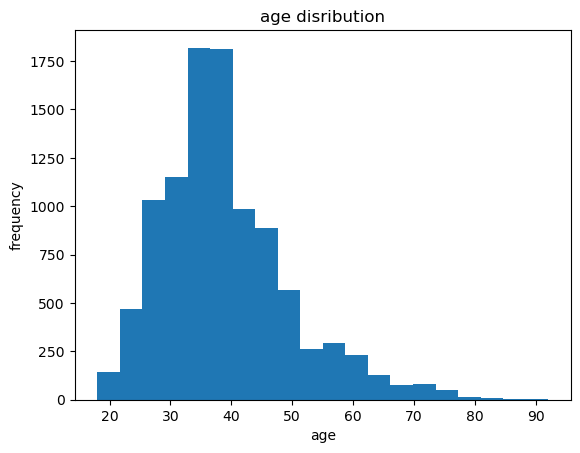

In [20]:
# age distribution

plt.hist(df['age'], bins = 20)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('age disribution')
plt.show()

In [22]:
df['age_range'] = pd.qcut(
    df['age'],
    q = 3,
    labels = ['youth', 'adult', 'elderly']
)

In [25]:
age_churn = df.groupby('age_range')['churn'].mean()
age_churn

# from this, it is confirmed that bank customer churn increases with age.
# from the data, the elderly has the highest customer churn of ~39.9% follow by the adult with ~14.9% before the youth with ~7.8%
# i can then say age is a big factor in customer churn.

C:\Users\user\AppData\Local\Temp\ipykernel_10252\3368761117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('age_range')['churn'].mean()


age_range
youth      0.078826
adult      0.149710
elderly    0.398756
Name: churn, dtype: float64

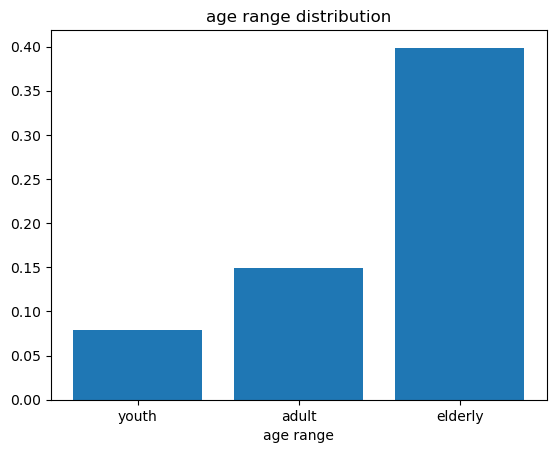

In [27]:
plt.bar(age_churn.index, age_churn.values)
plt.xlabel('age range')
plt.title('age range distribution')
plt.show()

In [28]:
# gender affect churn?

df.groupby('gender')['churn'].mean()

# female has 25% churn percentage compare to the male ~16.4% churn

gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64

In [29]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,elderly
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,adult
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,elderly
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,adult
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,adult
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,adult
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,elderly


In [30]:
# churn by active members

df.groupby('active_member')['churn'].mean()

# 1 means active and 0 inactive, we have a ~26.8% churn increase on inactive member compare to the ~14.2% of active member.
# so therefore inactive increases churn.

active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64

In [31]:
# country increases churn?

df.groupby('country')['churn'].mean()


# customer in germany is twice as high as in spain and france.

country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64

In [32]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,elderly
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,adult
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,elderly
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,elderly


In [37]:
df.groupby(pd.qcut(df['estimated_salary'], 3))['churn'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_10252\4119337815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['estimated_salary'], 3))['churn'].mean()


estimated_salary
(11.579, 67057.27]        0.201320
(67057.27, 132801.57]     0.197660
(132801.57, 199992.48]    0.212121
Name: churn, dtype: float64

In [39]:
# churn by estimated salary

df['salary_range'] = pd.cut(
    df['estimated_salary'],
    bins = [0, 67057.27, 132801.57, 199992.48],
    labels = ['low_income', 'mid_income', 'high_income']
)

In [41]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_range,salary_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,elderly,mid_income
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,adult,mid_income
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,elderly,mid_income
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,adult,mid_income
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,elderly,mid_income


In [43]:
df.groupby('salary_range')['churn'].mean()

# from this now, we can conclude that estimated salary plays a minimal role in customer churn seeing 
# that the difference between low, mid and high income earners is ~0.2% churn.

C:\Users\user\AppData\Local\Temp\ipykernel_10252\3002184308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('salary_range')['churn'].mean()


salary_range
low_income     0.201260
mid_income     0.197720
high_income    0.212121
Name: churn, dtype: float64

In [45]:
df.groupby(df['balance'])['churn'].mean()

balance
0.00         0.138236
3768.69      1.000000
12459.19     1.000000
14262.80     0.000000
16893.59     0.000000
               ...   
216109.88    1.000000
221532.80    0.000000
222267.63    1.000000
238387.56    1.000000
250898.09    1.000000
Name: churn, Length: 6382, dtype: float64

In [46]:
df['balance'].max()

250898.09

In [47]:
df['balance'].min()

0.0

In [81]:
# churn by balance

df['balance_range'] = pd.cut(
    df['balance'],
    bins = [0.00, 90000.00, 180000.00, 251000.00],
    labels = ['low_balance', 'mid_balace', 'high_balance']
)

In [74]:
df.drop('balance_range', axis = 1, inplace = True)

In [82]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_range,salary_range,balace_range,balance_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,elderly,mid_income,NaN,NaN
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,adult,mid_income,low_balance,low_balance
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,elderly,mid_income,mid_balace,mid_balace
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,adult,mid_income,NaN,NaN
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,elderly,mid_income,mid_balace,mid_balace


In [80]:
df['balance'].dtypes

dtype('float64')

In [83]:
df['balance_range'].unique()

[NaN, 'low_balance', 'mid_balace', 'high_balance']
Categories (3, object): ['low_balance' < 'mid_balace' < 'high_balance']

In [85]:
df['balance'].isnull().sum()

np.int64(0)

In [86]:
df.groupby('balance_range')['churn'].mean()

# high balance category has high churn rate of ~31.8% compare to mid balance with ~24.4% and low balace with 20.6%
# we can conclude that the higher your balance, the higher customer churn.

C:\Users\user\AppData\Local\Temp\ipykernel_10252\3659014961.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('balance_range')['churn'].mean()


balance_range
low_balance     0.206091
mid_balace      0.244941
high_balance    0.318750
Name: churn, dtype: float64

In [87]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_range,salary_range,balace_range,balance_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,elderly,mid_income,NaN,NaN
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,adult,mid_income,low_balance,low_balance
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,elderly,mid_income,mid_balace,mid_balace
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,adult,mid_income,NaN,NaN
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,elderly,mid_income,mid_balace,mid_balace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,adult,mid_income,NaN,NaN
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,adult,mid_income,low_balance,low_balance
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,adult,low_income,NaN,NaN
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,elderly,mid_income,low_balance,low_balance


In [90]:
# churn by credit score

df.groupby(pd.qcut(df['credit_score'], 3))['churn'].mean()

# the credit score plays a minimal role on the churn.

C:\Users\user\AppData\Local\Temp\ipykernel_10252\3464017278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['credit_score'], 3))['churn'].mean()


credit_score
(349.999, 608.0]    0.215284
(608.0, 695.0]      0.197660
(695.0, 850.0]      0.198002
Name: churn, dtype: float64

In [91]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_range,salary_range,balace_range,balance_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,elderly,mid_income,NaN,NaN
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,adult,mid_income,low_balance,low_balance
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,elderly,mid_income,mid_balace,mid_balace
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,adult,mid_income,NaN,NaN
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,elderly,mid_income,mid_balace,mid_balace


In [97]:
# convert gender to numeric 

df['gender_num'] = df['gender'].map({'male': 0, 'female': 1})


# convert balance range to numeric

df['balance_range_num'] = df['balance_range'].map({
    'low_balance': 1,
    'mid_balance': 2,
    'high_balance': 3
})

In [102]:
df.groupby('country').agg(
    {'age': 'mean',
     'gender_num': 'mean',
     'active_member': 'mean',
     'estimated_salary': 'mean',
     'balance_range_num': 'mean',
     'credit_score': 'mean',
     'churn': 'mean'
        
    }
)

,age,gender_num,active_member,estimated_salary,balance_range_num,credit_score,churn
country,,,,,,,
France,38.511767,NaN,0.516753,99899.180814,1.294896,649.668329,0.161548
Germany,39.771622,NaN,0.497409,101113.435102,1.259366,651.453567,0.324432
Spain,38.890997,NaN,0.529673,99440.572281,1.275093,651.333872,0.166734
